In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Rule 1 -- Support = 0.1 , Confidence > 0.4 , Lift  > 1

In [2]:
book_df = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\Association rules\\ASSIGNMENT\\book.csv')

In [3]:
book_df.shape

(2000, 11)

In [4]:
book_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 171.9 KB


In [6]:
from mlxtend.frequent_patterns import apriori,association_rules

In [7]:
frequent_items = apriori(book_df , min_support=0.1 , use_colnames= True)
# Filtering books and combination of books which has occurred atleast once (support of .1)

In [8]:
frequent_items
# Filtered Items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [9]:
rule_1 = association_rules(frequent_items , metric= 'confidence' ,min_threshold= .4 , )
# filtering data with min confidence of .4

In [10]:
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
65,"(CookBks, DoItYBks)",(GeogBks),0.1875,0.2760,0.1085,0.578667,2.096618,0.056750,1.718354
66,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
67,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
68,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [11]:
rules_new = rule_1.sort_values('confidence' , ascending=False).reset_index()
# Sorting based on confidence

In [12]:
rules_new.drop('index' ,axis=1 ,inplace= True)

In [13]:
rules_new

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
2,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
3,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
65,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
66,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375
67,(DoItYBks),(YouthBks),0.2820,0.2475,0.1155,0.409574,1.654846,0.045705,1.274505
68,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270


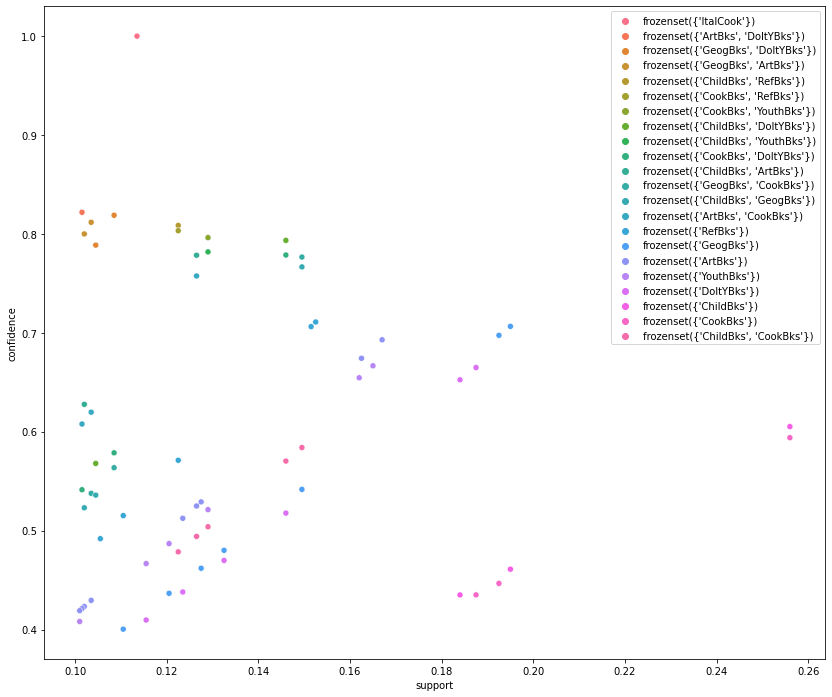

In [14]:
plt.figure(figsize=(14,12))
sns.scatterplot(data=rules_new , x='support' , y='confidence' ,hue='antecedents')
plt.legend(loc = 0)

<AxesSubplot:ylabel='Count'>

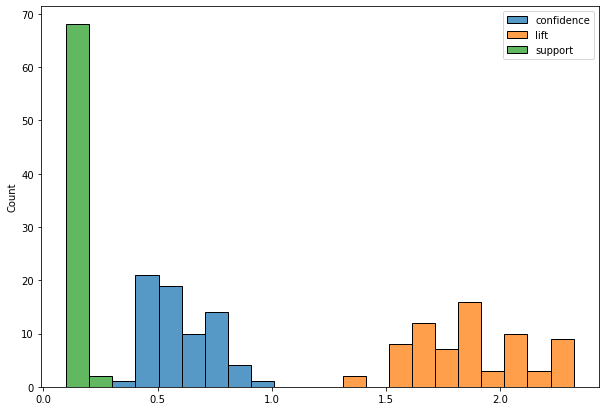

In [15]:
plt.figure(figsize=(10,7))
sns.histplot([rules_new.confidence,rules_new.lift,rules_new.support],bins=22)
# Support of majority of points lies within .3 and lift of all points with confidence > .4 is greater than 1.

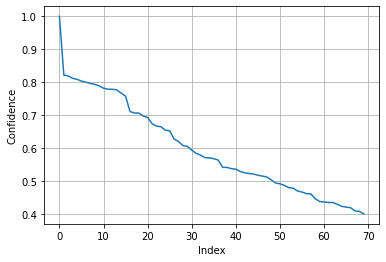

In [16]:
plt.plot(rules_new.index , rules_new.confidence)
plt.xlabel("Index")
plt.ylabel("Confidence")
plt.grid()
# Variation of confidence 

In [17]:
rules_new[rules_new['lift'] >1 ]
# All values are having lift value  >1 (True Occurrence)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
2,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
3,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
65,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
66,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375
67,(DoItYBks),(YouthBks),0.2820,0.2475,0.1155,0.409574,1.654846,0.045705,1.274505
68,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270


In [18]:
rules_new[rules_new['confidence'] > .8]
# with support >.1 and confidence >.8 , below are books that customers likely to buy in combination.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
2,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
3,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
5,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


# Rule 2 -- Support = 0.2 , Confidence > 0.5 , Lift  > 1

In [19]:
frequent_items_1 = apriori(book_df , min_support= 0.2 , use_colnames= True)

In [20]:
frequent_items_1
# Only 7 items has support > .2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [21]:
rule_2 = association_rules(frequent_items_1 , metric= 'confidence' , min_threshold=.5)

In [22]:
rule_2
# Only 2 items with confidence of > .5 [ 1 combination]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [23]:
# From rule 2 .
# Person who by cook books are most likely to buy Child book also and vice versa.

# Rule 3 -- Support = 0.1 , Confidence > 0.2  , Lift  > 1

In [25]:
frequent_items_2 = apriori(book_df , min_support= 0.1 , use_colnames= True)

In [26]:
rule_3 = association_rules(frequent_items_2 , metric= 'confidence' , min_threshold=.2)

In [27]:
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [30]:
rule_3.sort_values('confidence',ascending=False).reset_index(drop=True)
# Items with support >.1 and confidence > .2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
2,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
3,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
95,(CookBks),"(GeogBks, DoItYBks)",0.4310,0.1325,0.1085,0.251740,1.899926,0.051392,1.159357
96,(ChildBks),"(GeogBks, DoItYBks)",0.4230,0.1325,0.1045,0.247045,1.864490,0.048452,1.152127
97,(ChildBks),"(GeogBks, ArtBks)",0.4230,0.1275,0.1020,0.241135,1.891253,0.048067,1.149743
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='confidence', ylabel='Density'>

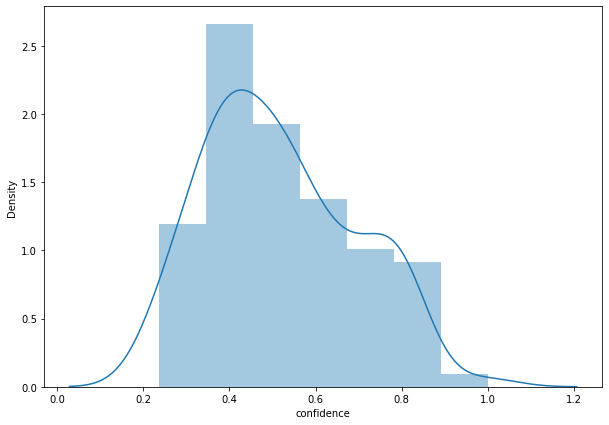

In [33]:
plt.figure(figsize=(10,7))
sns.distplot(rule_3.confidence)
# Distribution plot of confidence

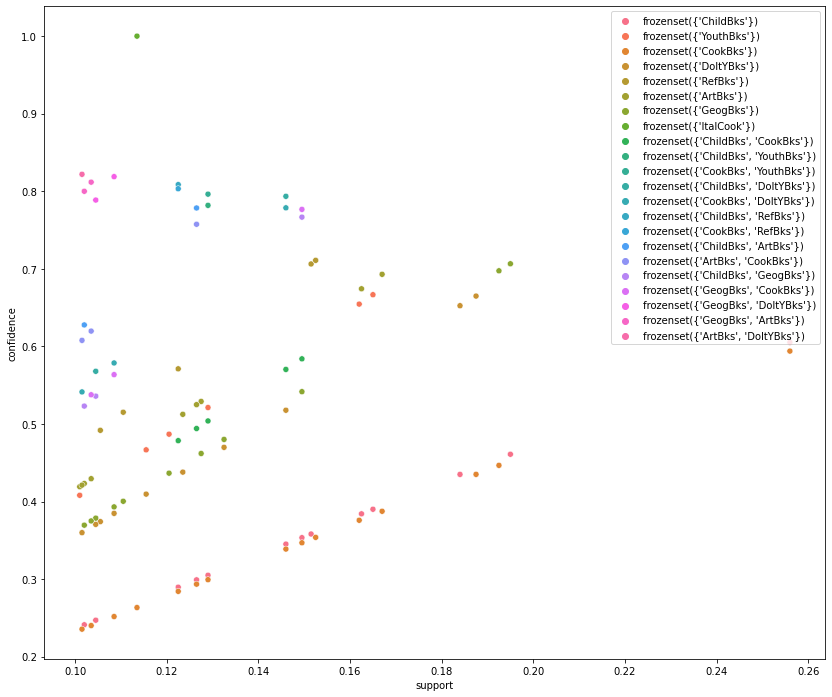

In [34]:
plt.figure(figsize=(14,12))
sns.scatterplot(data=rule_3 , x='support' , y='confidence' ,hue='antecedents')
plt.legend(loc = 0)
# Scatter plot of support vs confidence.